<div style='background: #e1ff00'> <h1>Student Information</h1>  
    
Name: Miss Pattamon Rattanapan

Student ID: 108065436

GitHub ID: https://github.com/mon826

Kaggle name:Username : mon826 (display name TheRicky, account ID 2514034)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import math
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
#import tensorflow_datasets as tfds
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import helpers.data_mining_helpers as dmh

2.0.0


In [2]:
#Import prepared dataset

traindf = pd.read_csv('traindf.csv')

testdf = pd.read_csv('testdf.csv')
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)

In [3]:
import nltk

"""
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [0]:
#Print the import data to see how it looks like
'''data
'''

In [0]:
#Then print out the data as list to see
'''
data[1]
'''

In [0]:
#  Put it in pandas dataframe
#pass the data into panda dataframe
'''
ddata = pd.DataFrame(data)
ddata
'''

In [0]:
#Then add the new column to the dataframe by bringing the data from its' list
'''
ddata['id'] = ddata['_source'].apply(lambda x: x['tweet']['tweet_id'])
ddata['hashtag'] = ddata['_source'].apply(lambda x: x['tweet']['hashtags'])
ddata['text'] = ddata['_source'].apply(lambda x: x['tweet']['text'])
ddata
'''

In [0]:
#  Split the column and rearrange
#Split the colum _crawldate to two separate columns which are date and time
'''
ddata[['date','time']] = ddata._crawldate.str.split(' ',expand=True)

#Then we print to see how the data look like
ddata
'''

In [0]:
#delete the column
'''
ddata.drop(columns = '_index',inplace = True)
ddata.drop(columns = '_source',inplace = True)
ddata.drop(columns = '_type',inplace = True)
ddata
'''

In [0]:
#Rename the column to be easier to read and print the data to see 
#but the date and time is stored under the same column and the source is starting with {'tweet'{hastags'
'''
ddata.rename(columns={'_crawldate':'date&time'}, inplace = True)
ddata.rename(columns={'_score':'score'}, inplace = True)
ddata
'''

In [0]:
#Rearrange the columns and print it to see how it looks like
'''
ddata = ddata[['id','score','hashtag','text','date&time','date','time']]

#Finally get the data which is ready to use 
ddata
'''

#### Data Preparation

In [0]:
#Import the file data identification by using pandas
'''
col_Names2=["id", "identification"]
dfid = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework\Data for Lab2_HW\data_identification.csv',
                      names =col_Names2, header =0)
dfid
'''

In [0]:
#Import the file emotion by using pandas
'''
col_Names=["id", "emotion"]
emotion = pd.read_csv(r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework\Data for Lab2_HW\emotion.csv', header = 0, names =col_Names)
emotion
'''

In [0]:
#Merge the ddate and emotion dataframe together 
#>>https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order
#But it's wrong it's vertically merged
'''
totaldf = pd.concat([ddata, dfid], ignore_index=True, sort=True)
totaldf
'''

In [0]:
#Try again, Ok it works 
#>> https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas

'''
totaldf = pd.merge(ddata, dfid, on='id',sort = True)
totaldf
'''

# Train dataset 

In [0]:
#Then cut the file into 2 separate dataset by its identification
#Cut the file for training set first
'''
traindf = totaldf[totaldf['identification']=='train']
traindf
'''

In [0]:
#Then print its' basic info to see
'''
traindf.info()
'''

In [0]:
#Then we can see that the number of row for the training data and the emotion (the result of prediction) is the same
#Then we combine those two file together
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
'''
traindf = pd.merge(traindf, emotion, on = None,sort = True)
traindf
'''

In [0]:
#Remove stop words and convert to lower case
'''
def remove_stop(traindf):
    stop_words = set(stopwords.words('english')) 
    
    #Remove the punctuation
    #traindf = traindf.translate(str.maketrans('', '', string.punctuation)) 
    
    #convert to lowercase chracter
    traindf = traindf.lower()
    word_tokens = word_tokenize(traindf) 

    filtered_traindf = [w for w in word_tokens if not w in stop_words] 
    filtered_traindf = ' '.join(filtered_traindf)
    return filtered_traindf
    '''

In [0]:
#Then add the remove stop words back to the dataframe
'''
traindf['filtered_traindf'] = traindf.text.apply(lambda x:remove_stop(x))
traindf
'''

In [0]:
#Remove the puntuation
'''
def punct(traindf):
    traindf = traindf.translate(str.maketrans('', '', string.punctuation)) 
 
    filtered_traindf2 = [w for w in word_tokens if not w in stop_words] 
    filtered_traindf2 = ' '.join(filtered2_traindf)
    return filtered_traindf2
    '''

In [0]:
#Then add the remove stop words back to the dataframe
'''
traindf['filtered_traindf2'] = traindf.text.apply(lambda x:remove_stop(x))
traindf
'''

In [0]:
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = traindf['emotion'].unique()
post_total = len(traindf)
df1 = traindf.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()
'''

###  For easier processing, I prepare the file from my laptop then import to use 

In [3]:
traindf = pd.read_csv('traindf.csv')
# Dataset is now stored in a Pandas Dataframe

In [17]:
traindf

,id,score,hashtag,text,date&time,date,time,identification,emotion,filtered_traindf,filtered_traindf2
0,0x1c7f10,242,['BlackMirror'],o m g Shut Up And Dance though #BlackMirror <LH>,2015-05-16 10:36:47,2015-05-16,10:36:47,train,joy,g shut dance though # blackmirror < lh >,g shut dance though # blackmirror < lh >
1,0x1c7f11,915,"['twitch', 'Destinybeta', 'Destiny', 'Destiny2...",On #twitch <LH> on the #Destinybeta #Destiny #...,2016-10-15 20:46:37,2016-10-15,20:46:37,train,anticipation,# twitch < lh > # destinybeta # destiny # dest...,# twitch < lh > # destinybeta # destiny # dest...
2,0x1c7f14,939,[],A nice sunny wak this morning not many <LH> ar...,2016-07-04 07:22:56,2016-07-04,07:22:56,train,joy,"nice sunny wak morning many < lh > aroud , whi...","nice sunny wak morning many < lh > aroud , whi..."
3,0x1c7f15,181,"['Confession', 'NationalCandyCornDay', 'CouldE...",I'm one of those people who love candy corn......,2016-04-16 12:53:40,2016-04-16,12:53:40,train,joy,'m one people love candy corn ... lot . 😁😂 # c...,'m one people love candy corn ... lot . 😁😂 # c...
4,0x1c7f16,970,[],@metmuseum What are these? They look like some...,2017-04-22 17:50:28,2017-04-22,17:50:28,train,disgust,@ metmuseum ? look like something toddlers mak...,@ metmuseum ? look like something toddlers mak...
...,...,...,...,...,...,...,...,...,...,...,...
1455558,0x38fe18,922,[],@LJPBR @FifthHarmony Um My vote For @FifthHar...,2016-12-06 11:10:57,2016-12-06,11:10:57,train,sadness,@ ljpbr @ fifthharmony um vote @ fifthharmony ...,@ ljpbr @ fifthharmony um vote @ fifthharmony ...
1455559,0x38fe19,77,"['WesHoolahan', 'WALvIRL', 'COYBIG']",Where is #WesHoolahan?! #WALvIRL #COYBIG <LH>,2015-02-01 18:04:28,2015-02-01,18:04:28,train,anticipation,# weshoolahan ? ! # walvirl # coybig < lh >,# weshoolahan ? ! # walvirl # coybig < lh >
1455560,0x38fe1a,25,"['not', 'maga']",@mattmfm Fake news! <LH> propagated by Tumpkin...,2016-12-20 17:19:58,2016-12-20,17:19:58,train,surprise,@ mattmfm fake news ! < lh > propagated tumpki...,@ mattmfm fake news ! < lh > propagated tumpki...
1455561,0x38fe1c,639,[],..today was brutal ..#Hungover,2016-09-13 06:31:27,2016-09-13,06:31:27,train,disgust,..today brutal .. # hungover,..today brutal .. # hungover


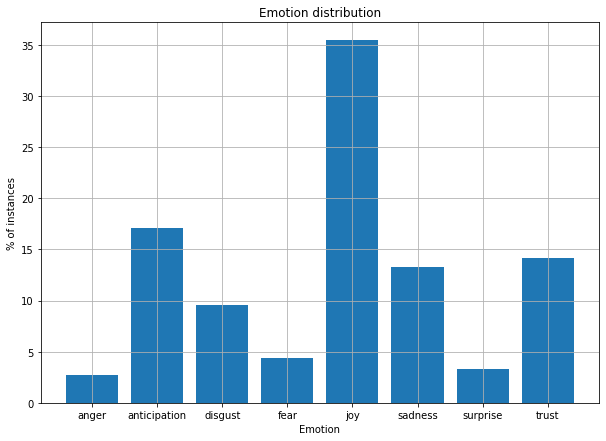

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = traindf['emotion'].unique()
post_total = len(traindf)
traindf = traindf.groupby(['emotion']).count()['text']
traindf = traindf.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(traindf.index,traindf.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# Test dataset 

In [8]:
#Then cut the file for testing dataset
'''
testdf = totaldf[totaldf['identification']=='test']
testdf
'''

"\ntestdf = totaldf[totaldf['identification']=='test']\ntestdf\n"

In [9]:
'''
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)
'''

"\ntestdf['emotion'] = testdf.apply(lambda _: '', axis=1)\n"

In [10]:
#Then print its' basic info to see
'''
testdf.info()
'''

'\ntestdf.info()\n'

###  For easier processing, I prepare the file from my laptop then import to use 

In [4]:
testdf = pd.read_csv('testdf.csv')
# Dataset is now stored in a Pandas Dataframe

In [5]:
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)

In [5]:
#Then print its' basic info to see
testdf.info()

testdf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411972 entries, 0 to 411971
Data columns (total 9 columns):
id                411972 non-null object
score             411972 non-null int64
hashtag           411972 non-null object
text              411972 non-null object
date&time         411972 non-null object
date              411972 non-null object
time              411972 non-null object
identification    411972 non-null object
emotion           411972 non-null object
dtypes: int64(1), object(8)
memory usage: 28.3+ MB


,id,score,hashtag,text,date&time,date,time,identification,emotion
0,0x1c7f0f,62,[],"@JZED74 While inappropriate AF, he likely wasn...",2017-05-14 11:39:43,2017-05-14,11:39:43,test,
1,0x1c7f12,756,[],I tried to figure out why you mean so much to ...,2016-02-14 15:55:45,2016-02-14,15:55:45,test,
2,0x1c7f13,213,"['auspol', 'fizza']","The only “big plan” you ever had in your life,...",2016-07-25 17:05:35,2016-07-25,17:05:35,test,
3,0x1c7f17,603,[],"Looking back on situations old & new, recent o...",2017-01-21 19:25:33,2017-01-21,19:25:33,test,
4,0x1c7f18,609,[],@jasoninthehouse Why do you insist on talking ...,2017-04-25 16:36:47,2017-04-25,16:36:47,test,
...,...,...,...,...,...,...,...,...,...
411967,0x38fe04,497,"['traitor', 'treason']","""The Grand Bargain"" The Great American Betraya...",2016-12-05 19:57:34,2016-12-05,19:57:34,test,
411968,0x38fe06,187,"['FosterCare', 'roadtoadoption', 'Adoption']",I get to be a 1 year old girl's new mama start...,2017-07-15 19:43:46,2017-07-15,19:43:46,test,
411969,0x38fe13,139,['artworld'],Asian dude with dangly gold earrings is back &...,2017-07-13 07:01:50,2017-07-13,07:01:50,test,
411970,0x38fe14,251,"['nba', 'cantmakeaJ']",I think @kostakoufos might be the worst player...,2016-08-22 22:13:06,2016-08-22,22:13:06,test,


# Data Preprocessing
## Check the data

In [18]:
#Preprocessing
#Checking for the missing value and duplicate data
traindf.isnull().apply(lambda x: dmh.check_missing_values(traindf))

#There is no missing data in the file

emotion
anger           (The amoung of missing records is: , 0)
anticipation    (The amoung of missing records is: , 0)
disgust         (The amoung of missing records is: , 0)
fear            (The amoung of missing records is: , 0)
joy             (The amoung of missing records is: , 0)
sadness         (The amoung of missing records is: , 0)
surprise        (The amoung of missing records is: , 0)
trust           (The amoung of missing records is: , 0)
Name: text, dtype: object

# Create Bag of Words

In [81]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(traindf['text'])

train_data_BOW_features_500 = BOW_500.transform(traindf['text'])

## check dimension
train_data_BOW_features_500.shape

(1455563, 500)

In [82]:
train_data_BOW_features_500.toarray()

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 4,  3,  0, ...,  0,  0,  0]], dtype=int64)

In [83]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

#random value 500 top

['change',
 'christ',
 'christmas',
 'class',
 'closed',
 'come',
 'comes',
 'coming',
 'could',
 'country']

# Create Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [34]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(traindf['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(traindf['filtered_traindf'])
test_data_BOW_features = BOW_vectorizer.transform(testdf['text'])

In [36]:
# check the result
train_data_BOW_features

<1455563x794247 sparse matrix of type '<class 'numpy.int64'>'
	with 12484170 stored elements in Compressed Sparse Row format>

In [37]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [38]:
# check the dimension
train_data_BOW_features.shape

(1455563, 794247)

In [39]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['005',
 '00533321',
 '00575',
 '00578',
 '005796',
 '005e5n',
 '006',
 '0060',
 '007',
 '00786mujahid']

# Decision Trees Model

In [44]:
'''
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(traindf['text'])
y_train = traindf['emotion']
'''

In [45]:
'''
X_test = BOW_500.transform(testdf['text'])
y_test = testdf['emotion']
'''

In [46]:
'''
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
'''

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [47]:
'''
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)
'''

In [48]:
'''
## training!
DT_model = DT_model.fit(X_train, y_train)
'''

In [49]:
'''
## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
'''

In [50]:
'''
## so we get the pred result
y_test_pred[:10]
'''

array(['sadness', 'disgust', 'trust', 'joy', 'surprise', 'joy', 'sadness',
       'joy', 'anticipation', 'trust'], dtype=object)

In [51]:
'''
#Check the accuracy

## accuracy testing on decision tree model
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

#at first I will submit the result, but after checking it, i will let it go~
#it is cleary that the model is overfitting.
#I know that there is the problem before trying the model but I just want to see the result
'''

training accuracy: 0.97
testing accuracy: 0.0


In [52]:
'''
y_test_pred[:10]
'''

array(['sadness', 'disgust', 'trust', 'joy', 'surprise', 'joy', 'sadness',
       'joy', 'anticipation', 'trust'], dtype=object)

In [53]:
'''
y_test_pred2 = DT_model.predict(X_test)
'''

In [54]:
'''
#Print the result - Decision Tree model
test_id = testdf.id
'''

In [55]:
'''
def listOfTuples(test_id, y_test_pred2): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred2)) 
'''

In [56]:
'''
finalresult = (listOfTuples(test_id, y_test_pred2))
'''

In [57]:
'''
finalresult[0:1]
'''

[('0x1c7f0f', 'sadness')]

In [58]:
'''
dfresult = pd.DataFrame(finalresult) 
'''

In [59]:
'''
dfresult
'''

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,disgust
2,0x1c7f13,trust
3,0x1c7f17,joy
4,0x1c7f18,surprise
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,trust
411969,0x38fe13,joy
411970,0x38fe14,trust


In [60]:
'''
#assign header names
dfresult.columns = ['id','emotion']
'''

In [61]:
'''
dfresult
'''

,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,disgust
2,0x1c7f13,trust
3,0x1c7f17,joy
4,0x1c7f18,surprise
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,trust
411969,0x38fe13,joy
411970,0x38fe14,trust


In [62]:
'''
#save the file to csv format
exportcsv = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework\Dataset_Twitter_re_Decision tRee.csv', index = None, header=True) 

print (dfresult)

Submit score: 0.27xxxxxx ( I cannot remember the exact number)
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 33-34: truncated \UXXXXXXXX escape (<ipython-input-62-353974d216c0>, line 5)

# Naive Bays Models

In [0]:
'''
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
'''

In [0]:
'''
# Create the vectorizer 

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)
'''

In [0]:
'''
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']
'''

In [0]:
'''
#Train the model
from sklearn.naive_bayes import MultinomialNB
MulNB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MulNB.fit(X_train, y_train)
MulNB.score(X_test, y_test)
'''

0.0

In [0]:
'''
#Test on the real data
## build Naive Bayes model
NV_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

## training the data
NV_model = NV_model.fit(X_train, y_train)

## predict!
y_train_pred = NV_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = NV_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]
'''

array(['sadness', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'anticipation', 'anticipation'],
      dtype='<U12')

In [0]:
'''
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 2)))
'''

training accuracy: 0.65


In [0]:
'''
y_test_pred2 = NV_model.predict(X_test)
y_test_pred2[:10]
'''

array(['sadness', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'anticipation', 'anticipation'],
      dtype='<U12')

In [0]:
'''
# Print the result - Naive Bays model

test_id = testdf.id
def listOfTuples(test_id, y_test_pred2): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred2)) 

finalresult2 = (listOfTuples(test_id, y_test_pred2))
finalresult2[0:10]
'''

[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'sadness'),
 ('0x1c7f13', 'disgust'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'anticipation')]

In [0]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult2 = pd.DataFrame(finalresult2) 
dfresult2
'''

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [0]:
'''
#Then assign header names and print the data to see
dfresult2.columns = ['id','emotion']
dfresult2
'''

,id,emotion
0,0x1c7f0f,sadness
1,0x1c7f12,sadness
2,0x1c7f13,disgust
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,disgust


In [0]:
'''
#Then export the file 

exportcsv2 = dfresult2.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework\Dataset_Twitter_re2.csv', 
                               index = None, header=True) 

print (dfresult2)

Submit score: the highest submit score: 0.45008
'''

              id       emotion
0       0x1c7f0f       sadness
1       0x1c7f12       sadness
2       0x1c7f13       disgust
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


''

## Clustering: Word2Vector

In [0]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
traindf['text_tokenized'] = traindf['text'].apply(lambda x: nltk.word_tokenize(x))
traindf[['id', 'text', 'text_tokenized']].head()

#Take the text_tokenized to the training_corpus

,id,text,text_tokenized
0,0x1c7f10,o m g Shut Up And Dance though #BlackMirror <LH>,"[o, m, g, Shut, Up, And, Dance, though, #, Bla..."
1,0x1c7f11,On #twitch <LH> on the #Destinybeta #Destiny #...,"[On, #, twitch, <, LH, >, on, the, #, Destinyb..."
2,0x1c7f14,A nice sunny wak this morning not many <LH> ar...,"[A, nice, sunny, wak, this, morning, not, many..."
3,0x1c7f15,I'm one of those people who love candy corn......,"[I, 'm, one, of, those, people, who, love, can..."
4,0x1c7f16,@metmuseum What are these? They look like some...,"[@, metmuseum, What, are, these, ?, They, look..."


In [0]:
## create the training corpus
training_corpus = traindf['text_tokenized'].values
training_corpus[:3]

In [0]:
# Train the model

## the input type
traindf['text_tokenized'] = traindf['text'].apply(lambda x: nltk.word_tokenize(x))
traindf[['id', 'text', 'text_tokenized']].head()

In [0]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [0]:
#Test the model with testdata
word2vec_model_result = word2vec_model.most_similar('happy', topn=10)

In [0]:
### Generating word vector (embeddings): Word2Vector

# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

In [0]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

In [0]:
# clustering target
target_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise','trust']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

In [0]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

In [0]:
#check cluster membership
word = 'happy'
word_vec = word2vec_model.wv[word]
kmeans_result = kmeans_model.predict([word_vec])

In [0]:
kmeans_result[:10]

# Deep learning model

In [84]:
import keras
import tensorflow

# standardize name (X, y) 
X_train = BOW_500.transform(traindf['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(testdf['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

KeyboardInterrupt: 

In [0]:
'''
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)
'''

In [0]:
#Build the model
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [0]:
#Create the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [0]:
#Train
## Training to see the accuracy of prediction >> accuracy = accuracy on training set and val_accuracy = accuracy on testing set
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

In [0]:
#Predict the data on testset

#predict on testing result, this is the generation for vector but the result is unreable by human
#While predict, we use the X_test
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

In [0]:
#Then we make it readable here>> the first one the predicable is sadness, the next one is fear and etc.
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

In [0]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

In [0]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

In [10]:
#References: https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

In [63]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    #text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    


In [64]:
traindf['text'] = traindf['text'].apply(clean_text)

In [65]:
traindf['hashtag'] = traindf['hashtag'].apply(clean_text)

In [67]:
print(traindf['text'])
print(traindf['hashtag'])

0                           g shut dance though #blackmirror
1          #twitch #destinybeta #destiny #destiny2 #desti...
2          nice sunny wak morning many aroud whites time ...
3          im one people love candy corn lot #confession ...
4          metmuseum look like something toddlers make su...
                                 ...                        
1455558    ljpbr fifthharmony um vote fifthharmony song s...
1455559                        #weshoolahan #walvirl #coybig
1455560     mattmfm fake news propagated tumpkins #not #maga
1455561                               today brutal #hungover
1455562    love sun burn forehead #redheadproblems #ouch ...
Name: text, Length: 1455563, dtype: object
0                                                  lackirror
1          twitch estinybeta estiny estiny2 estinytheame ...
2                                                           
3          onfession ationalandyornay ouldathemllay ohame...
4                                         

In [66]:
traindf['text'].apply(lambda x: len(x.split(' '))).sum()
traindf['hashtag'].apply(lambda x: len(x.split(' '))).sum()

2202529

In [68]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)

In [69]:
# Create the vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()#stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)

In [70]:
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']

In [71]:
#Train the model
from sklearn.naive_bayes import MultinomialNB
MulNB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MulNB.fit(X_train, y_train)
MulNB.score(X_test, y_test)

0.0

In [72]:
#Test on the real data
## build Naive Bayes model
NV_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

## training the data
NV_model = NV_model.fit(X_train, y_train)

## predict!
y_train_pred = NV_model.predict(X_train)

X_test_pred = test_countvec
y_test_pred = NV_model.predict(test_countvec)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'joy', 'anticipation', 'anticipation', 'sadness', 'joy',
       'joy', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [73]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.650292704609831


In [74]:
# Print the result - Naive Bays model

test_id = testdf.id
def listOfTuples(test_id, y_test_pred): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred)) 

finalresult = (listOfTuples(test_id, y_test_pred))
finalresult[0:10]

[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'anticipation'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'joy'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [75]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re31.csv', 
                               index = None, header=True) 
print (dfresult)


Submit score: 0.38481
'''

              id       emotion
0       0x1c7f0f       sadness
1       0x1c7f12           joy
2       0x1c7f13  anticipation
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14           joy
411971  0x38fe1b           joy

[411972 rows x 2 columns]


In [76]:
#Another tuning model
'''
X_train = traindf['text']
y_train = traindf['emotion']
X_test = testdf['text']
y_test = testdf['emotion']
'''

"\nX_train = traindf['text']\ny_train = traindf['emotion']\nX_test = testdf['text']\ny_test = testdf['emotion']\n"

In [40]:
'''
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb_model = Pipeline([('vect', CountVectorizer()),
               #('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)),
              ])

## training the data
nb_model = nb_model.fit(X_train, y_train)

## predict!
y_train_pred = nb_model.predict(X_train)

X_test_pred = X_test
y_test_pred = nb_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

'''

array(['sadness', 'joy', 'anticipation', 'anticipation', 'sadness', 'joy',
       'joy', 'anticipation', 'anticipation', 'joy'], dtype='<U12')

In [61]:
'''
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train1, 15)))
'''

"\n## Result Evaluation /accuracy\nfrom sklearn.metrics import accuracy_score\n\nacc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred)\nacc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred)\n\nprint('training accuracy: {}'.format(round(acc_train1, 15)))\n"

In [48]:
'''
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred)) 

finalresult = (listOfTuples(test_id, y_test_pred))
finalresult[0:10]
'''

[('0x1c7f0f', 'sadness'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'anticipation'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'joy'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'anticipation'),
 ('0x1c7f32', 'joy')]

In [52]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re30.csv', 
                               index = None, header=True) 
print (dfresult)

submit score: 0.38481
'''

,0,1
0,0x1c7f0f,sadness
1,0x1c7f12,joy
2,0x1c7f13,anticipation
3,0x1c7f17,anticipation
4,0x1c7f18,sadness
...,...,...
411967,0x38fe04,sadness
411968,0x38fe06,joy
411969,0x38fe13,joy
411970,0x38fe14,joy


# Linear support vector machine

In [96]:
from sklearn.linear_model import SGDClassifier

'''
sgd = Pipeline([('vect', CountVectorizer()),
                #('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
'''
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [97]:
#Preparing data before feeding into the vectorizer
#by combine hastag, text and score for both test and train dataset
traincombined = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
testcombined = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)

In [98]:
# Create the vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

train_countvec = count_vect.fit_transform(traincombined)
test_countvec = count_vect.transform(testcombined)

In [99]:
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']

In [100]:
## training the data
sgd_model = sgd.fit(X_train, y_train)

In [101]:
## predict!
%time
y_train_pred_sgd_model = sgd_model.predict(X_train)

X_test_pred_sgd_model = test_countvec
y_test_pred_sgd_model = sgd_model.predict(test_countvec)

## so we get the pred result
y_test_pred_sgd_model[:10]

Wall time: 0 ns


array(['fear', 'joy', 'joy', 'anticipation', 'sadness', 'joy', 'sadness',
       'surprise', 'trust', 'anticipation'], dtype='<U12')

In [104]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_sgd_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred_sgd_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.557639896040226


In [105]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_sgd_model): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred_sgd_model)) 

finalresult = (listOfTuples(test_id, y_test_pred_sgd_model))
finalresult[0:10]

[('0x1c7f0f', 'fear'),
 ('0x1c7f12', 'joy'),
 ('0x1c7f13', 'joy'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'surprise'),
 ('0x1c7f2d', 'trust'),
 ('0x1c7f32', 'anticipation')]

In [107]:

'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re33.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 0.40721
'''

              id       emotion
0       0x1c7f0f          fear
1       0x1c7f12           joy
2       0x1c7f13           joy
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       sadness
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

In [7]:
#by combine hastag, text and score for both test and train dataset
X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_train = traindf['emotion']
X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_test = testdf['emotion']

'''
X_train = train_countvec
y_train = traindf['emotion']
X_test = test_countvec
y_test = testdf['emotion']
'''

"\nX_train = train_countvec\ny_train = traindf['emotion']\nX_test = test_countvec\ny_test = testdf['emotion']\n"

In [8]:
logreg_model = logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [10]:
## predict!
%time
y_train_pred_logreg_model = logreg_model.predict(X_train)

#X_test_pred_logreg_model = test_countvec
y_test_pred_logreg_model = logreg_model.predict(X_test)

## so we get the pred result
y_test_pred_logreg_model[:10]

Wall time: 0 ns


array(['fear', 'sadness', 'disgust', 'anticipation', 'sadness', 'joy',
       'sadness', 'anticipation', 'trust', 'joy'], dtype=object)

In [11]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_logreg_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_test_pred_logreg_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

training accuracy: 0.805949313083666


In [ ]:
'''
%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

'''

In [12]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_logreg_model): 
    return list(map(lambda x, y:(x,y), test_id, y_test_pred_logreg_model)) 

finalresult = (listOfTuples(test_id, y_test_pred_logreg_model))
finalresult[0:10]

[('0x1c7f0f', 'fear'),
 ('0x1c7f12', 'sadness'),
 ('0x1c7f13', 'disgust'),
 ('0x1c7f17', 'anticipation'),
 ('0x1c7f18', 'sadness'),
 ('0x1c7f21', 'joy'),
 ('0x1c7f24', 'sadness'),
 ('0x1c7f29', 'anticipation'),
 ('0x1c7f2d', 'trust'),
 ('0x1c7f32', 'joy')]

In [13]:
'''
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_re34.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 0.43311
'''

              id       emotion
0       0x1c7f0f          fear
1       0x1c7f12       sadness
2       0x1c7f13       disgust
3       0x1c7f17  anticipation
4       0x1c7f18       sadness
...          ...           ...
411967  0x38fe04       disgust
411968  0x38fe06           joy
411969  0x38fe13           joy
411970  0x38fe14       disgust
411971  0x38fe1b           joy

[411972 rows x 2 columns]


# Word2vec embedding and Logistic Regression

In [23]:
%time
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

Wall time: 0 ns


In [24]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [25]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [26]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [28]:
#by combine hastag, text and score for both test and train dataset
#X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
X_train = traindf['text']
y_train = traindf['emotion']
#X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
X_test = testdf['text']
y_test = testdf['emotion']

In [29]:
#train, test = train_test_split(df, test_size=0.3, random_state = 42)
test_tokenized = testdf.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [30]:
train_tokenized = traindf.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [31]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).



In [32]:
from sklearn.linear_model import LogisticRegression
logreg_Word2vec_model = LogisticRegression(n_jobs=1, C=1e5)

In [ ]:
## training the data
logreg_Word2vec_model = logreg_Word2vec_model.fit(X_train_word_average, traindf['text'])
%time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [ ]:
## predict!
y_train_pred_Word2vec = logreg_Word2vec_model.predict(X_train)

y_pred_Word2vec = logreg_Word2vec_model.predict(X_test_word_average)
y_pred_Word2vec[:10]

In [ ]:
## Result Evaluation /accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=y_train, y_pred=y_train_pred_Word2vec_model)
acc_test1 = accuracy_score(y_true=y_test, y_pred=y_pred_Word2vec_model)

print('training accuracy: {}'.format(round(acc_train1, 15)))

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

In [ ]:
# Print the result 

test_id = testdf.id
def listOfTuples(test_id, y_test_pred_logreg_model): 
    return list(map(lambda x, y:(x,y), test_id, y_pred_Word2vec)) 

finalresult = (listOfTuples(test_id, y_pred_Word2vec))
finalresult[0:10]

In [ ]:
#Pass the result into panda dataframe and print the result to see
dfresult = pd.DataFrame(finalresult) 
dfresult

#Then assign header names and print the data to see
dfresult.columns = ['id','emotion']
dfresult

#Then export the file 
exportcsv2 = dfresult.to_csv (r'C:\Users\User\Data Mining_NTHU\DMlab2x\DM19-Lab2-Homework_Twitter - ทำไฟล์ตรงนี้ เวลาอัพไปอัพที่อื่น\Dataset_Twitter_Word2vec embedding and Logistic Regression.csv', 
                               index = None, header=True) 
print (dfresult)

#submit score: 

# Doc2vec and Logistic Regression

In [4]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [5]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [6]:
#by combine hastag, text and score for both test and train dataset
X_train = traindf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_train = traindf['emotion']
X_test = testdf[['text','hashtag','score']].astype(str).apply('-'.join, axis=1)
y_test = testdf['emotion']

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

NameError: name 'doc2vec' is not defined

In [ ]:
all_data[:2]

In [ ]:

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

In [ ]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

# BOW with keras

In [19]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [12]:
'''
train_size = int(len(traindf) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(testdf) - train_size))
'''

Train size: 1018894
Test size: -606922


In [13]:
train_text = traindf['text'][:train_size]
train_hashtag = traindf['hashtag'][:train_size]

test_text = testdf['text'][train_size:]
test_hashtag = testdf['hashtag'][train_size:]

In [14]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [15]:
tokenize.fit_on_texts(train_text) # only fit on train
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [17]:
encoder = LabelEncoder()
encoder.fit(train_hashtag)
y_train = encoder.transform(train_hashtag)
y_test = encoder.transform(test_hashtag)

In [18]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

MemoryError: 

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

In [ ]:
batch_size = 32
epochs = 2

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

# Using NLTK

In [ ]:
#https://towardsdatascience.com/twitter-sentiment-analysis-classification-using-nltk-python-fa912578614c

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [3]:
#Import prepared dataset

traindf = pd.read_csv('traindf.csv')

testdf = pd.read_csv('testdf.csv')
testdf['emotion'] = testdf.apply(lambda _: '', axis=1)

In [ ]:
#remove stopwords
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(traindf['text'].iloc[10])))
print(traindf['text'].iloc[10])

In [ ]:
#Lexicon Normalization
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

# modified Data 

In [2]:
#Import prepared dataset
traindf_m = pd.read_csv('traindf.csv')

testdf_m = pd.read_csv('testdf.csv')
testdf_m['emotion'] = testdf_m.apply(lambda _: '', axis=1)

In [14]:
import emoji

ModuleNotFoundError: No module named 'emoji'

In [12]:
import emoji
import emot
emoji.demojize(traindf_m['filtered_traindf'], delimiters=("", ""))

ModuleNotFoundError: No module named 'emoji'

In [13]:
import demoji

ModuleNotFoundError: No module named 'demoji'